In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("kartik2112/fraud-detection")

print("Path to dataset files:", path)

/opt/homebrew/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: /Users/sumeyahussein/.cache/kagglehub/datasets/kartik2112/fraud-detection/versions/1


In [4]:
#everyone run this block
import os
import pandas as pd
import kagglehub

# Download the dataset
path = kagglehub.dataset_download("kartik2112/fraud-detection")
print("Path to dataset files:", path)

# List all files in the downloaded directory
print("Files in dataset directory:", os.listdir(path))

# Load the CSV file (assuming it is named fraudTest.csv in the downloaded files)
csv_path = os.path.join(path, "fraudTrain.csv") #fraudTest
df = pd.read_csv(csv_path)

# Display the DataFrame
print(df.head())


Path to dataset files: /Users/sumeyahussein/.cache/kagglehub/datasets/kartik2112/fraud-detection/versions/1
Files in dataset directory: ['fraudTrain.csv', 'fraudTest.csv']
   Unnamed: 0 trans_date_trans_time            cc_num  \
0           0   2019-01-01 00:00:18  2703186189652095   
1           1   2019-01-01 00:00:44      630423337322   
2           2   2019-01-01 00:00:51    38859492057661   
3           3   2019-01-01 00:01:16  3534093764340240   
4           4   2019-01-01 00:03:06   375534208663984   

                             merchant       category     amt      first  \
0          fraud_Rippin, Kub and Mann       misc_net    4.97   Jennifer   
1     fraud_Heller, Gutmann and Zieme    grocery_pos  107.23  Stephanie   
2                fraud_Lind-Buckridge  entertainment  220.11     Edward   
3  fraud_Kutch, Hermiston and Farrell  gas_transport   45.00     Jeremy   
4                 fraud_Keeling-Crist       misc_pos   41.96      Tyler   

      last gender                 

In [ ]:
#Spandana runs this
import os
import pandas as pd
#import kagglehub

# Download the dataset
path = r"C:\Users\Thinking1\vsc_workspace\FDS"

# List all files in the downloaded directory
print("Files in dataset directory:", os.listdir(path))

csv_path = os.path.join(path, "fraudTrain.csv")
df = pd.read_csv(csv_path)

# Display the DataFrame
print(df.head())


In [ ]:
import os
import pandas as pd
#import kagglehub

# Download the dataset
path = r"/Users/nirjalagurung/fraud"
# List all files in the downloaded directory
print("Files in dataset directory:", os.listdir(path))

# Load the CSV file (assuming it is named fraudTest.csv in the downloaded files)
csv_path = os.path.join(path, "fraudTest.csv")
df = pd.read_csv(csv_path)

# Display the DataFrame
print(df.head())

In [21]:
import os
import pandas as pd
#import kagglehub

# Download the dataset
path = r"/Users/sumeyahussein/Desktop/fraud"
# List all files in the downloaded directory
print("Files in dataset directory:", os.listdir(path))

# Load the CSV file (assuming it is named fraudTest.csv in the downloaded files)
csv_path = os.path.join(path, "fraudTrain.csv")
df = pd.read_csv(csv_path)

# Display the DataFrame
print(df.head())

Files in dataset directory: ['fraudTrain.csv', 'fraudTest.csv']
   Unnamed: 0 trans_date_trans_time            cc_num  \
0           0   2019-01-01 00:00:18  2703186189652095   
1           1   2019-01-01 00:00:44      630423337322   
2           2   2019-01-01 00:00:51    38859492057661   
3           3   2019-01-01 00:01:16  3534093764340240   
4           4   2019-01-01 00:03:06   375534208663984   

                             merchant       category     amt      first  \
0          fraud_Rippin, Kub and Mann       misc_net    4.97   Jennifer   
1     fraud_Heller, Gutmann and Zieme    grocery_pos  107.23  Stephanie   
2                fraud_Lind-Buckridge  entertainment  220.11     Edward   
3  fraud_Kutch, Hermiston and Farrell  gas_transport   45.00     Jeremy   
4                 fraud_Keeling-Crist       misc_pos   41.96      Tyler   

      last gender                        street  ...      lat      long  \
0    Banks      F                561 Perry Cove  ...  36.0788  -81.

In [22]:
data_types = df.dtypes
print("\nData Types:\n", data_types)


Data Types:
 Unnamed: 0                 int64
trans_date_trans_time     object
cc_num                     int64
merchant                  object
category                  object
amt                      float64
first                     object
last                      object
gender                    object
street                    object
city                      object
state                     object
zip                        int64
lat                      float64
long                     float64
city_pop                   int64
job                       object
dob                       object
trans_num                 object
unix_time                  int64
merch_lat                float64
merch_long               float64
is_fraud                   int64
dtype: object


In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

missing_data = df.isnull().sum()
missing_percentage = (missing_data / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing Data': missing_data,
    'Missing Percentage': missing_percentage
}, index=df.columns)

missing_df_filtered = missing_df[missing_df['Missing Data'] > 0]

if not missing_df_filtered.empty:
    plt.figure(figsize=(12, 6))
    ax = sns.barplot(x=missing_df_filtered.index, y=missing_df_filtered['Missing Percentage'], palette="viridis")

    for i, (value, pct) in enumerate(zip(missing_df_filtered['Missing Data'], missing_df_filtered['Missing Percentage'])):
        ax.text(i, pct, f'{int(value)}', ha='center', va='bottom')

    plt.ylabel('Percentage of Missing Values')
    plt.title('Missing Data Analysis')
    ax.set_xlabel('Features with Missing Values')
    ax.tick_params(axis='x', rotation=90)
    ax.set_yscale('log')  

    plt.show()
else:
    print("No missing data found in the dataset.")

No missing data found in the dataset.


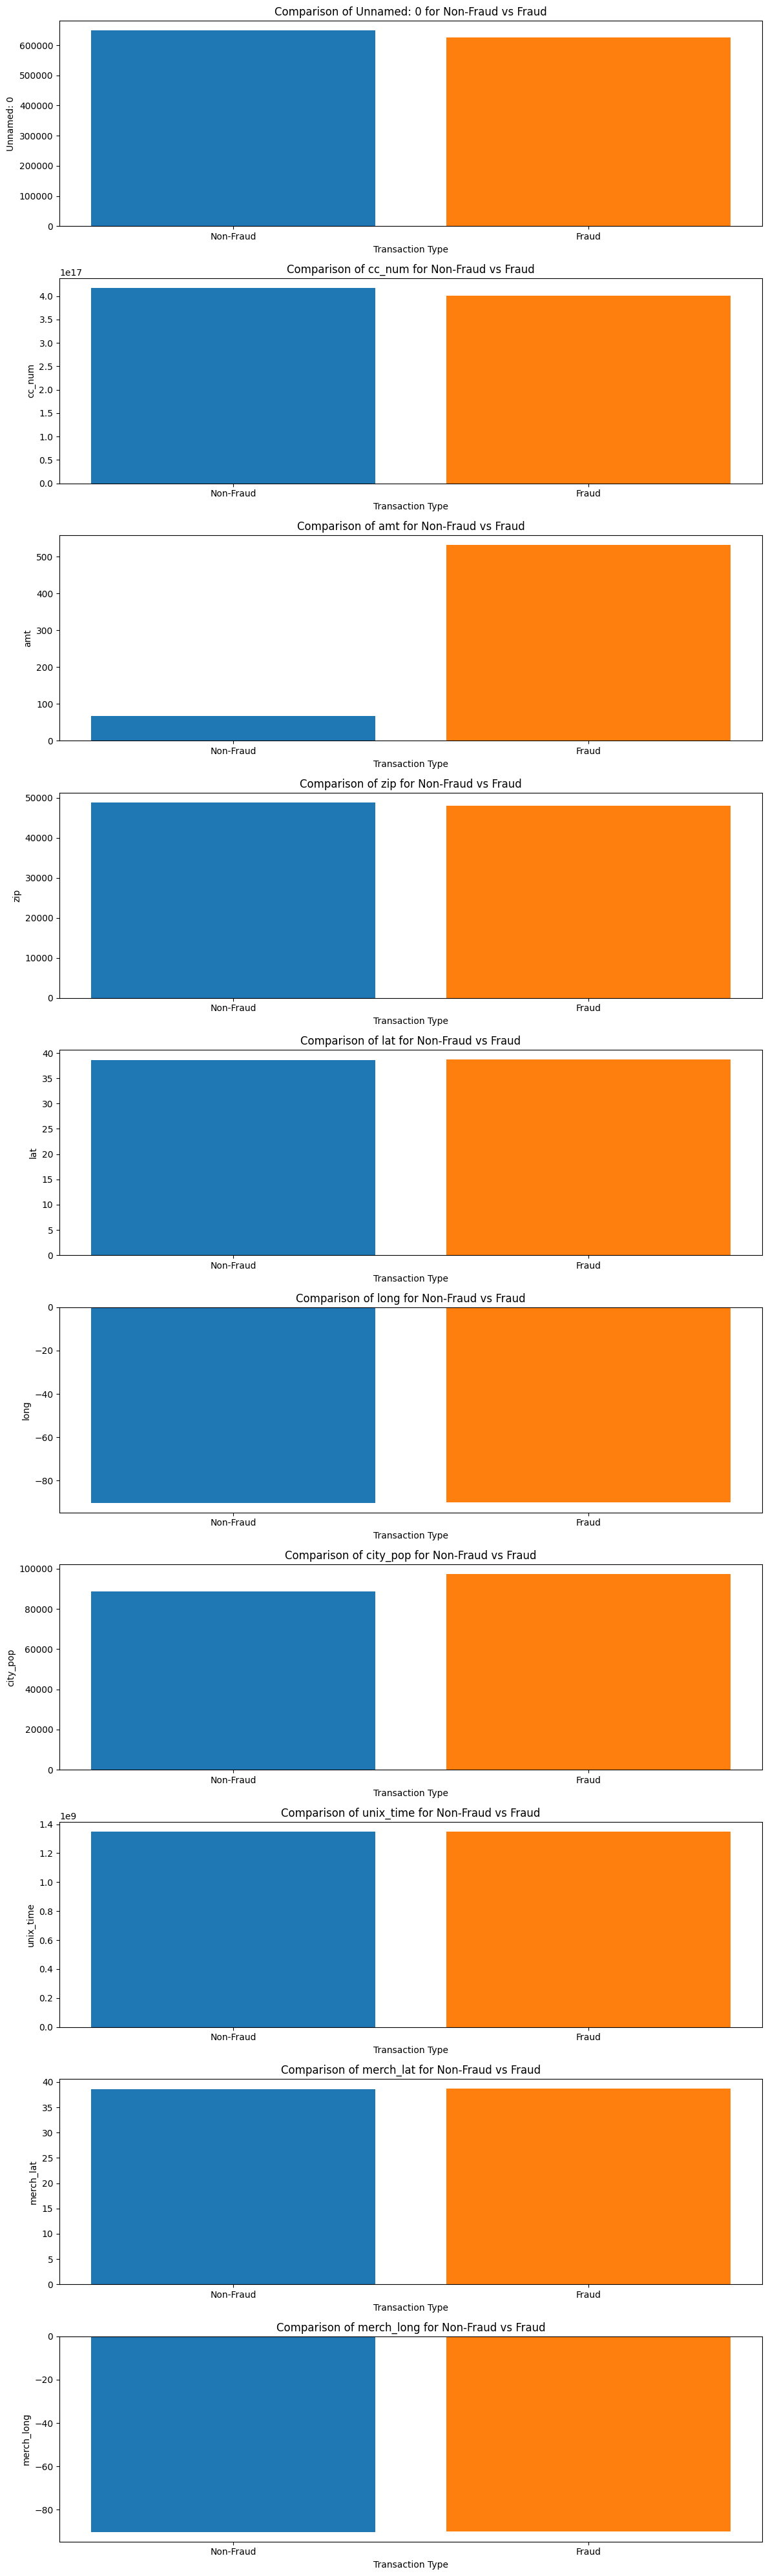

         Unnamed: 0 trans_date_trans_time            cc_num  \
2449           2449   2019-01-02 01:06:37     4613314721966   
2472           2472   2019-01-02 01:47:29   340187018810220   
2523           2523   2019-01-02 03:05:23   340187018810220   
2546           2546   2019-01-02 03:38:03     4613314721966   
2553           2553   2019-01-02 03:55:47   340187018810220   
...             ...                   ...               ...   
1295399     1295399   2020-06-21 01:00:08  3524574586339330   
1295491     1295491   2020-06-21 01:53:35  3524574586339330   
1295532     1295532   2020-06-21 02:16:56  4005676619255478   
1295666     1295666   2020-06-21 03:26:20  3560725013359375   
1295733     1295733   2020-06-21 03:59:46  4005676619255478   

                                     merchant       category      amt  \
2449                   fraud_Rutherford-Mertz    grocery_pos   281.06   
2472         fraud_Jenkins, Hauck and Friesen  gas_transport    11.52   
2523                   f

In [24]:
#checking is_fraud value 0 data values vs is_fraud value 1
import pandas as pd
import matplotlib.pyplot as plt

# Separate the data by is_fraud values
fraud_df = df[df['is_fraud'] == 1]
non_fraud_df = df[df['is_fraud'] == 0]

# Calculate means for numerical features by fraud type, looping over is_fraud
numerical_columns = [col for col in df.select_dtypes(include=['float64', 'int64']).columns if col != 'is_fraud']

fraud_means = fraud_df[numerical_columns].mean()
non_fraud_means = non_fraud_df[numerical_columns].mean()

# Plotting the comparisons
fig, ax = plt.subplots(len(numerical_columns), 1, figsize=(12, len(numerical_columns) * 4))

for i, col in enumerate(numerical_columns):
    ax[i].bar(['Non-Fraud', 'Fraud'], [non_fraud_means[col], fraud_means[col]], color=['#1f77b4', '#ff7f0e'])
    ax[i].set_title(f'Comparison of {col} for Non-Fraud vs Fraud')
    ax[i].set_ylabel(col)
    ax[i].set_xlabel('Transaction Type')
    
plt.tight_layout()
plt.show()

# Filter rows with is_fraud equal to 1
fraudulent_transactions = df[df['is_fraud'] == 1]

# Display the rows with is_fraud == 1
print(fraudulent_transactions)


In [25]:
# Check if 'is_fraud' column contains only 0 and 1
unique_values = df['is_fraud'].unique()

if set(unique_values) == {0, 1}:
    print("The 'is_fraud' column is in the correct binary format (0 and 1) with no anomalies.")
else:
    print("Anomalies found in 'is_fraud' column:")
    print(f"Unexpected values: {unique_values}")


The 'is_fraud' column is in the correct binary format (0 and 1) with no anomalies.


cc_num: 0 outliers found.
category: 0 outliers found.
amt: 0 outliers found.
zip: 0 outliers found.
city_pop: 105531 outliers found.
Outliers in column city_pop replaced with median value: -0.31543257908677874
41117 rows identified as outliers using Z-score method.
Rows with Z-score outliers have been dropped.


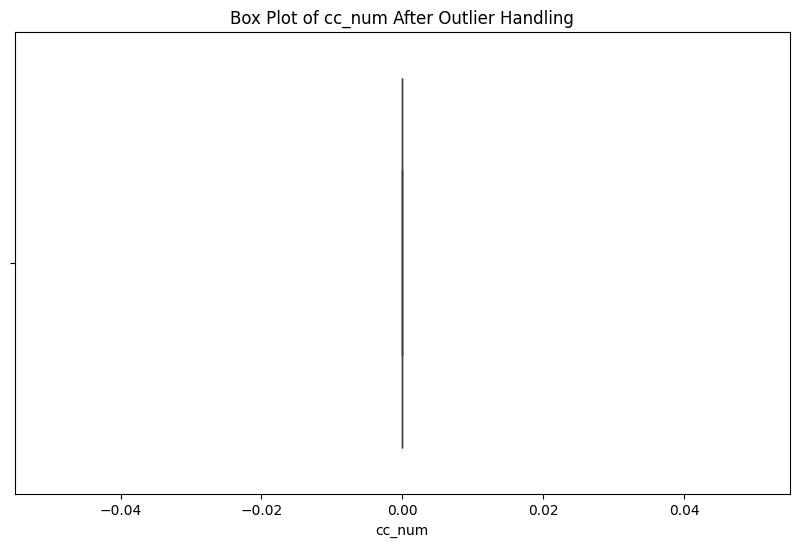

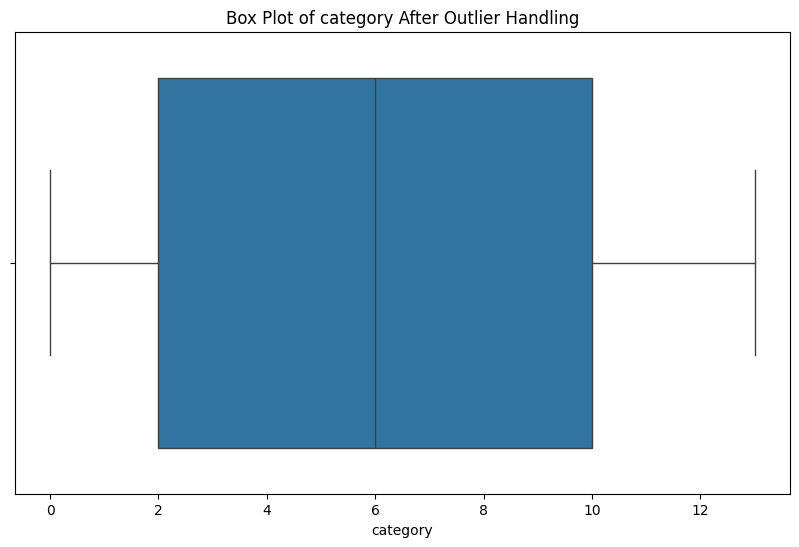

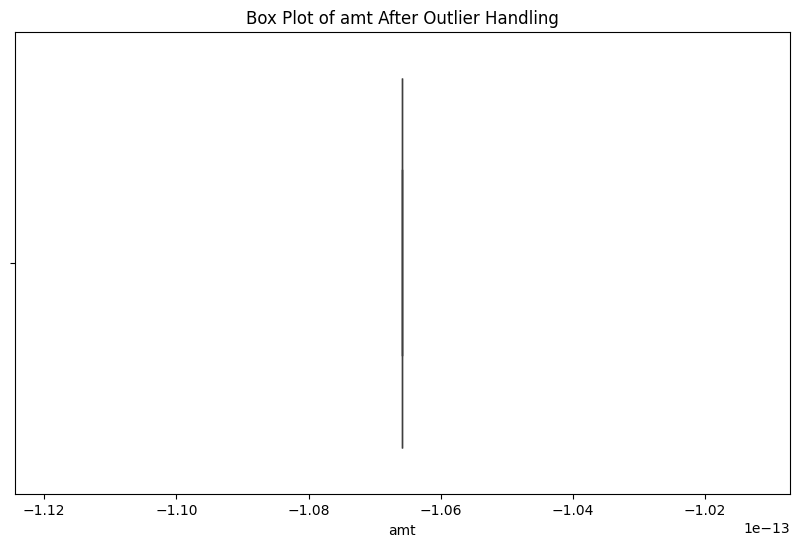

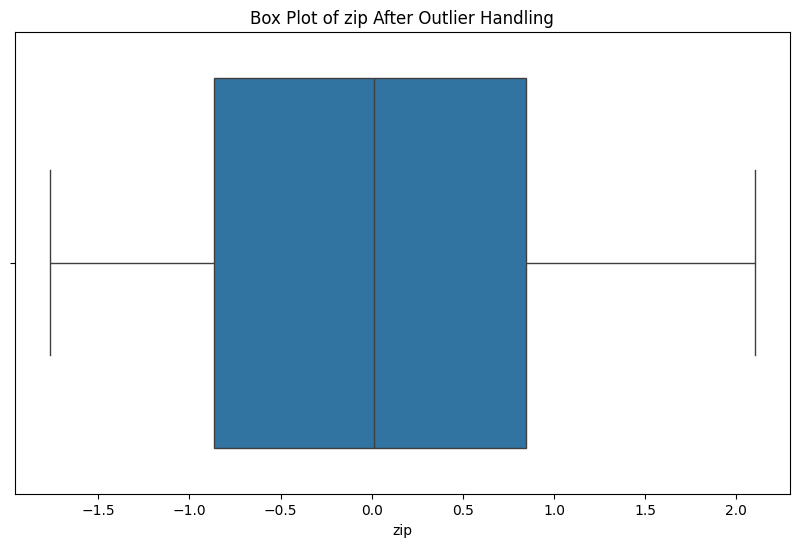

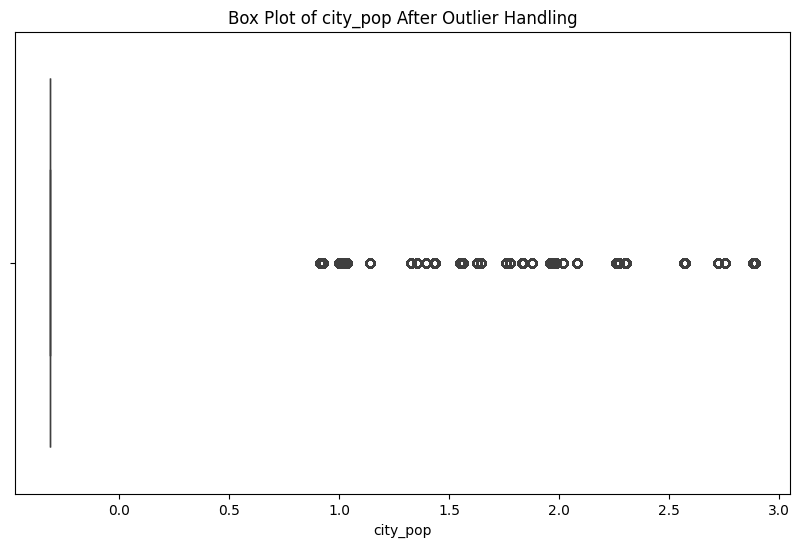

Unique values in lat:
36.385     3503
43.0048    3410
33.4783    3036
34.0326    3031
44.0575    3014
           ... 
42.3496     444
43.2229     443
34.1248     438
40.8095     434
42.1782     427
Name: lat, Length: 687, dtype: int64

Unique values in long:
-87.4769    944356
Name: long, dtype: int64

Unique values in merch_lat:
43.373076    4
41.212506    4
40.456305    4
40.550199    4
38.050673    4
            ..
39.391717    1
37.961079    1
34.052898    1
42.395385    1
42.78894     1
Name: merch_lat, Length: 916820, dtype: int64

Unique values in merch_long:
-87.43839200000001    944356
Name: merch_long, dtype: int64



In [ ]:
#checking for outliers 

import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore

df = df[df['is_fraud'] == False]

def find_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
outliers_dict = {}

for col in numerical_columns:
    if col != 'is_fraud':  # Skip the target column
        outliers = find_outliers_iqr(df, col)
        outliers_dict[col] = outliers
        print(f"{col}: {len(outliers)} outliers found.")

for col, outliers in outliers_dict.items():
    if not outliers.empty:
        # Strategy: Replace outliers with the median
        median_value = df[col].median()
        df.loc[(df[col] < outliers[col].min()) | (df[col] > outliers[col].max()), col] = median_value
        print(f"Outliers in column {col} replaced with median value: {median_value}")

#finding outliers with z score
z_scores = df[numerical_columns].apply(zscore)
outliers_z = (z_scores.abs() > 3).any(axis=1)
outlier_rows = df[outliers_z]

if outlier_rows.empty:
    print("No outliers found using Z-score method.")
else:
    print(f"{len(outlier_rows)} rows identified as outliers using Z-score method.")
    # Strategy: Drop rows with Z-score outliers
    df = df[~outliers_z]
    print("Rows with Z-score outliers have been dropped.")

for col in numerical_columns:
    if col != 'is_fraud':  # Skip the target column
        plt.figure(figsize=(10, 6))
        sns.boxplot(x=df[col])
        plt.title(f"Box Plot of {col} After Outlier Handling")
        plt.show()

categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    print(f"Unique values in {col}:\n{df[col].value_counts()}\n")

# writing cleaned dataset free/handling outliers 
#df.to_csv("fraudTrain_processed.csv", index=False)
df.to_csv("/Users/sumeyahussein/Desktop/fraud/fraudTrain_processed.csv", index=False)




In [ ]:
# outliers but a different visulization 

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import zscore

def find_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return len(outliers)

# Selecting numerical columns
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Dictionary to store outlier counts
outliers_count = {}

# Calculate outlier counts using IQR
for col in numerical_columns:
    if col != 'is_fraud':  # Skip the target column
        outliers_count[col] = find_outliers_iqr(df, col)

# Convert to DataFrame for easy visualization
outliers_df = pd.DataFrame(outliers_count.items(), columns=['Column', 'Outlier Count'])

# Plot a bar graph
plt.figure(figsize=(12, 6))
sns.barplot(data=outliers_df, x='Column', y='Outlier Count', palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.title("Number of Outliers in Each Column (IQR Method)")
plt.xlabel("Columns")
plt.ylabel("Outlier Count")
plt.show()


In [35]:
#chaning float into string for easier feasture selection

# Print current data types
data_types = df.dtypes
#print("\nData Types:\n", data_types)

# Convert all float columns to strings
float_columns = df.select_dtypes(include=['float64']).columns
df[float_columns] = df[float_columns].astype(str)

# Verify the conversion
print("\nUpdated Data Types:\n", df.dtypes)
#df.to_csv("fraudTrain_processed.csv", index=False)
df.to_csv("/Users/sumeyahussein/Desktop/fraud/fraudTrain_processed.csv", index=False)




Updated Data Types:
 cc_num         int64
category       int64
amt           object
zip           object
lat           object
long          object
city_pop      object
merch_lat     object
merch_long    object
is_fraud       int64
dtype: object


In [33]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Feature Engineering
unused_cols = ['Unnamed: 0', 'first', 'last', 'unix_time', 'street', 'gender', 'job', 'dob', 'city', 'state', 'trans_num', 'merchant']

# Ensure all columns exist in the DataFrame before dropping
unused_cols = [col for col in unused_cols if col in df.columns]
df.drop(columns=unused_cols, inplace=True)

# Check remaining DataFrame structure
df.info()

# Drop the original timestamp column after feature extraction
df.drop(columns=['trans_date_trans_time'], inplace=True)

# Encoding categorical columns
encoder = LabelEncoder()
if 'category' in df.columns:
    df['category'] = encoder.fit_transform(df['category'])
if 'cc_num' in df.columns:
    df['cc_num'] = encoder.fit_transform(df['cc_num'])

# Feature Scaling for numerical columns
scaler = StandardScaler()

# List of numerical columns to scale
scale_cols = ['amt', 'zip', 'city_pop']
for col in scale_cols:
    if col in df.columns:
        df[col] = scaler.fit_transform(df[[col]])

# Output the first few rows
print(df.head())

# Write to a new CSV file (optional)
# Uncomment the line below to save the processed DataFrame to a CSV file
#df.to_csv("fraudTrain_processed.csv", index=False)
df.to_csv("/Users/sumeyahussein/Desktop/fraud/fraudTrain_processed.csv", index=False)



<class 'pandas.core.frame.DataFrame'>
Int64Index: 944356 entries, 0 to 1296673
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   cc_num      944356 non-null  int64 
 1   category    944356 non-null  int64 
 2   amt         944356 non-null  object
 3   zip         944356 non-null  object
 4   lat         944356 non-null  object
 5   long        944356 non-null  object
 6   city_pop    944356 non-null  object
 7   merch_lat   944356 non-null  object
 8   merch_long  944356 non-null  object
 9   is_fraud    944356 non-null  int64 
dtypes: int64(3), object(7)
memory usage: 79.3+ MB


KeyError: "['trans_date_trans_time'] not found in axis"